# Which Kepler/K2 planets are useful for atmospheric followup?

### Assumptions

* Assume all planets have atmospheres (this is likely true for most planets)
* Assume no planets have clouds or hazes (this is unlikely)
* Assume a circular orbit (this is largely true)
* Assume HST WFC3 for followup instrument (this is reasonable)
* Assume 1 second exposure time with a scan rate of 0.15s (this could be improved for each target)
* Assume HST WFC3 has no saturation limit. (This could be acheived with scanning)
* Assume one observation is taken (this is an underestimate)
* Assume 50 pixels of the detector are illuminated for the scan (this is reasonable)
* Assume 5 scale heights of atmsophere (this is an approximation)
* Assume atmosphere is purely hyrdogen (this is likely to be wrong for most small planets)
* Assume atmosphere is entirely opaque in the WFC3 bandpass (this is an overestimate)
* Assume starspot free (this is unlikely)
* Where masses are unknown, assume mass-radius relation from Weiss 2014 (this is an approximation)
* Assume 2MASS photometry is correct (this is reasonable)
* Assume planets have no reflection, all light us absorbed

All told, this will provide an overestimate of the signal or the 'best case' scenario.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.constants import G, m_p, k_B
%matplotlib inline
plt.style.use('ggplot')

Define small planets as 3 earth radii

In [7]:
NEXSCI_API = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI'
planets = pd.read_csv(NEXSCI_API + '?table=planets&select=pl_hostname,pl_letter,pl_disc,ra,dec,pl_trandep,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranflag,pl_k2flag,pl_kepflag,pl_facility,st_rad,st_teff,st_optmag,st_j,st_h', comment='#')
composite = pd.read_csv(NEXSCI_API + '?table=compositepars&select=fpl_hostname,fpl_letter,fpl_smax,fpl_radj,fpl_bmassj,fpl_bmassjerr1,fpl_bmassjerr2,fpl_eqt,fpl_orbper,fpl_orbpererr1,fpl_orbpererr2,', comment='#')
composite.columns = ['pl_hostname','pl_letter','pl_orbsmax','pl_radj','pl_bmassj','pl_bmassjerr1','pl_bmassjerr2','pl_eqt','pl_orbper','pl_orbpererr1','pl_orbpererr2']

In [8]:
df = pd.merge(left=planets, right=composite, how='left', left_on=['pl_hostname', 'pl_letter'], 
         right_on = ['pl_hostname', 'pl_letter'])
df

,pl_hostname,pl_letter,pl_disc,ra,dec,pl_trandep,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranflag,...,st_h,pl_orbsmax,pl_radj,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_eqt,pl_orbper,pl_orbpererr1,pl_orbpererr2
0,HD 98649,b,2012,170.215698,-23.217342,NaN,NaN,NaN,NaN,0,...,6.493,5.600000,1.130,6.80000,0.50000,-0.50000,NaN,4951.000000,6.070000e+02,-4.650000e+02
1,HD 99109,b,2005,171.072327,-1.529076,NaN,NaN,NaN,NaN,0,...,7.259,1.110000,1.280,0.44000,0.08000,-0.08000,NaN,439.299990,5.600000e+00,-5.600000e+00
2,HD 99492,b,2004,171.692825,3.006328,NaN,NaN,NaN,NaN,0,...,5.403,0.120000,0.448,0.07000,0.05000,-0.05000,NaN,17.043100,4.700000e-03,-4.700000e-03
3,HD 99706,b,2011,172.125885,43.966579,NaN,NaN,NaN,NaN,0,...,5.472,1.980000,1.244,1.23000,0.19000,-0.19000,NaN,841.000000,3.200000e+01,-3.200000e+01
4,HD 100546,b,2014,173.356003,-70.194786,NaN,NaN,NaN,NaN,0,...,5.962,53.000000,6.900,752.00000,NaN,NaN,NaN,NaN,NaN,NaN
5,HD 100655,b,2011,173.765640,20.441545,NaN,NaN,NaN,NaN,0,...,4.470,0.680000,1.210,1.61000,0.34000,-0.34000,NaN,157.570010,6.500000e-01,-6.500000e-01
6,HD 100777,b,2007,173.964676,-4.755697,NaN,NaN,NaN,NaN,0,...,6.804,1.030000,1.230,1.03000,0.04000,-0.04000,NaN,383.700010,1.200000e+00,-1.200000e+00
7,HD 101930,b,2005,175.875458,-58.006886,NaN,NaN,NaN,NaN,0,...,6.259,0.300000,0.949,0.25000,0.02000,-0.02000,NaN,70.460000,1.800000e-01,-1.800000e-01
8,HD 102117,b,2005,176.210251,-58.703709,NaN,NaN,NaN,NaN,0,...,5.949,0.150000,0.756,0.17000,0.01000,-0.01000,NaN,20.813300,6.400000e-03,-6.400000e-03
9,HD 102195,b,2006,176.426224,2.821483,NaN,NaN,NaN,NaN,0,...,6.268,0.050000,1.270,0.41000,0.02000,-0.02000,NaN,4.113770,5.600000e-04,-5.600000e-04


In [13]:
planets.merge(composite, on=['pl_hostname', 'pl_letter'], how='left')

,pl_hostname,pl_letter,pl_disc,ra,dec,pl_trandep,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranflag,...,st_h,pl_orbsmax,pl_radj,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_eqt,pl_orbper,pl_orbpererr1,pl_orbpererr2
0,HD 98649,b,2012,170.215698,-23.217342,NaN,NaN,NaN,NaN,0,...,6.493,5.600000,1.130,6.80000,0.50000,-0.50000,NaN,4951.000000,6.070000e+02,-4.650000e+02
1,HD 99109,b,2005,171.072327,-1.529076,NaN,NaN,NaN,NaN,0,...,7.259,1.110000,1.280,0.44000,0.08000,-0.08000,NaN,439.299990,5.600000e+00,-5.600000e+00
2,HD 99492,b,2004,171.692825,3.006328,NaN,NaN,NaN,NaN,0,...,5.403,0.120000,0.448,0.07000,0.05000,-0.05000,NaN,17.043100,4.700000e-03,-4.700000e-03
3,HD 99706,b,2011,172.125885,43.966579,NaN,NaN,NaN,NaN,0,...,5.472,1.980000,1.244,1.23000,0.19000,-0.19000,NaN,841.000000,3.200000e+01,-3.200000e+01
4,HD 100546,b,2014,173.356003,-70.194786,NaN,NaN,NaN,NaN,0,...,5.962,53.000000,6.900,752.00000,NaN,NaN,NaN,NaN,NaN,NaN
5,HD 100655,b,2011,173.765640,20.441545,NaN,NaN,NaN,NaN,0,...,4.470,0.680000,1.210,1.61000,0.34000,-0.34000,NaN,157.570010,6.500000e-01,-6.500000e-01
6,HD 100777,b,2007,173.964676,-4.755697,NaN,NaN,NaN,NaN,0,...,6.804,1.030000,1.230,1.03000,0.04000,-0.04000,NaN,383.700010,1.200000e+00,-1.200000e+00
7,HD 101930,b,2005,175.875458,-58.006886,NaN,NaN,NaN,NaN,0,...,6.259,0.300000,0.949,0.25000,0.02000,-0.02000,NaN,70.460000,1.800000e-01,-1.800000e-01
8,HD 102117,b,2005,176.210251,-58.703709,NaN,NaN,NaN,NaN,0,...,5.949,0.150000,0.756,0.17000,0.01000,-0.01000,NaN,20.813300,6.400000e-03,-6.400000e-03
9,HD 102195,b,2006,176.426224,2.821483,NaN,NaN,NaN,NaN,0,...,6.268,0.050000,1.270,0.41000,0.02000,-0.02000,NaN,4.113770,5.600000e-04,-5.600000e-04


In [14]:
small = 3*u.earthRad

Get the planet catalog from nexsci

In [15]:
import logging

In [16]:
logging.getLogger()

<RootLogger root (WARNING)>

In [17]:
NEXSCI_API = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI'
df = pd.read_csv(NEXSCI_API + '?table=planets&select=pl_hostname,pl_letter,pl_disc,ra,dec,pl_trandep,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranflag,pl_orbsmax,pl_radj,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_eqt,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_k2flag,pl_kepflag,pl_facility,st_rad,st_teff,st_optmag,st_j,st_h', comment='#')
df.to_csv('planets.csv')

In [18]:
# Add in any random unpublished planets...

df.loc[len(df),['pl_hostname', 'pl_letter', 'ra', 'dec', 'pl_trandep', 'pl_tranmid', 'st_teff', 'st_rad', 'st_j','st_optmag', 'st_h', 'pl_orbper', 'pl_radj','pl_tranflag','pl_orbsmax','pl_facility','pl_k2flag']] = ['Wolf 503', 'b', '206.8476824570807','-06.1368692373421',0.00072158, 2458179.372678949, 4716, 0.69, 8.324, 10.28, 7.774, 6.0013, 0.1811, 1,0.056833, 'K2',1]

Only use the transiting planets, calculate the equillibrium temperature and transit depth as these can be nans in nexsci for some reason. 

In [19]:
#We should only do this when there are nan values
df = df[df.pl_tranflag==1].reset_index(drop=True)

nan = ~np.isfinite(df.pl_eqt)
sep = np.asarray(df.pl_orbsmax)*u.AU
rstar = (np.asarray(df.st_rad)*u.solRad).to(u.AU)
temp = np.asarray(df.st_teff)*u.K
df.loc[nan, ['pl_eqt']] = (temp[nan]*np.sqrt(rstar[nan]/(2*sep[nan])))

nan = ~np.isfinite(df.pl_trandep)
df.loc[nan,['pl_trandep']] = ((np.asarray(df.pl_radj[nan])*u.jupiterRad).to(u.solRad)/(np.asarray(df.st_rad[nan])*u.solRad))**2

Use the mass/radius relation from Weiss 2014 for planets 1.5-4 earth radii to fill in any blank masses and ones with large errors

In [20]:
nan = ~np.isfinite(df.pl_bmassj)
higherrs = df.pl_bmassjerr1/df.pl_bmassj > 0.1
low = (np.asarray(df.pl_radj)*u.jupiterRad).to(u.earthRad)  > 1.5*u.earthRad
high = (np.asarray(df.pl_radj)*u.jupiterRad).to(u.earthRad)  < 4.*u.earthRad
recalculate = np.all([low,high, np.any([nan, higherrs], axis=0)], axis=0)

rade = (np.asarray(df.loc[recalculate,'pl_radj'])*u.jupiterRad).to(u.earthRad).value
df.loc[recalculate, 'pl_bmassj'] = (((2.69* rade)**0.93)*u.earthMass).to(u.jupiterMass).value

/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Assume a fully hydrogen atmosphere that has 5 scale heights and is completely opaque in the WFC3 bandpass

In [21]:
mu = 2
g = G * (np.asarray(df.pl_bmassj)*u.jupiterMass)/(np.asarray(df.pl_radj)*u.jupiterRad)**2
g = g.to(u.m/u.second**2)
H = ((k_B*np.asarray(df.pl_eqt)*u.K)/(mu * m_p*g)).to(u.km)

Change in transit depth due to atmosphere

In [22]:
delta = ((H*5) + ((np.asarray(df.pl_radj)*u.jupiterRad).to(u.km)))**2/((np.asarray(df.st_rad)*u.solRad).to(u.km))**2
delta = delta.value - (((np.asarray(df.pl_radj)*u.jupiterRad).to(u.km))**2/((np.asarray(df.st_rad)*u.solRad).to(u.km))**2)
df['delta'] = delta

In [23]:
#One second scan and a 50 pixel spectrum
exptime = 1
scansize = 50

star_fl = (5.5/0.15)*10.**(-0.4*(df.st_h-15))
#star_fl[star_fl>33000] = 33000
fl = df.delta*star_fl
fl *= scansize * exptime

df['snr'] = fl**0.5

k2 = df[(df.pl_k2flag==1)&(df.pl_facility=='K2')].reset_index(drop=True)
kepler = df[(df.pl_kepflag==1)&(df.pl_facility=='Kepler')].reset_index(drop=True)

/Users/ch/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


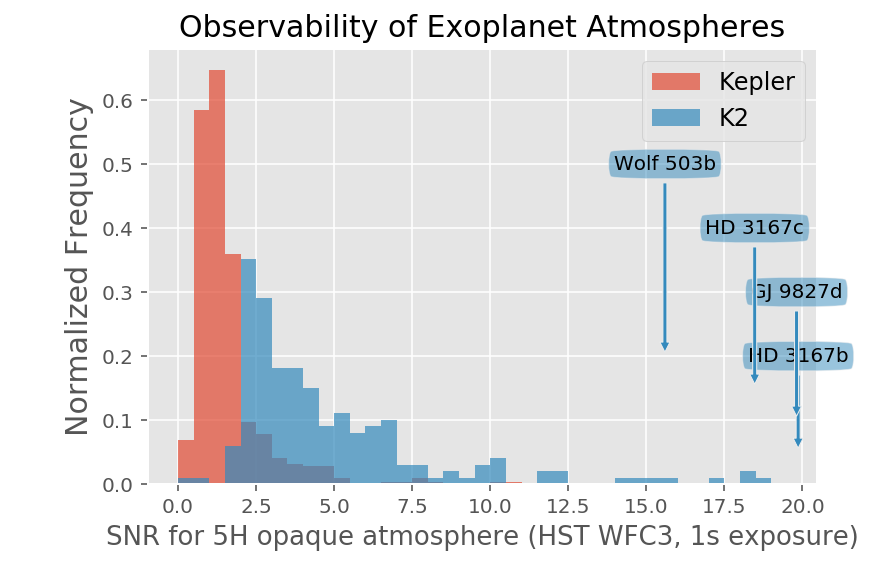

In [24]:
fig, ax = plt.subplots()
fl = kepler.snr
h=plt.hist((fl[np.isfinite(fl)]), np.arange(0,20,0.5), normed=True, alpha=0.7, label='Kepler')

fl = k2.snr
plt.hist((fl[np.isfinite(fl)]), h[1], normed=True, alpha=0.7, label='K2')

plt.xlabel('SNR for 5H opaque atmosphere (HST WFC3, 1s exposure)', fontsize=13)
plt.ylabel('Normalized Frequency', fontsize=15)
plt.title('Observability of Exoplanet Atmospheres', fontsize=15)
plt.legend(fontsize=12)
plt.savefig('charts/K2observability.png', dpi=300, bbox_inches='tight')

#Annotations
ok = (np.asarray(k2.pl_radj)*u.jupiterRad).to(u.earthRad) < small
i=0
df1 = k2[ok].sort_values('snr', ascending=False)
for i, n, l, x, y  in zip(range(len(df)), df1.pl_hostname, df1.pl_letter, df1.snr, df1.pl_orbper):
    ann = ax.annotate("{}{}".format(n, l),
                      xy=(x, 0.+i*0.05), xycoords='data',
                      xytext=(x, 0.1+i*0.1), textcoords='data',
                      size=10, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="C1", alpha=0.5),
                      arrowprops=dict(arrowstyle="simple",
                                      connectionstyle="arc3, rad=-{}".format(0),
                                      fc="C1"), 
                      )
    i+=1
    if i>=5:
        break
        
plt.savefig('charts/K2observability_annotated.png', dpi=300, bbox_inches='tight')

/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


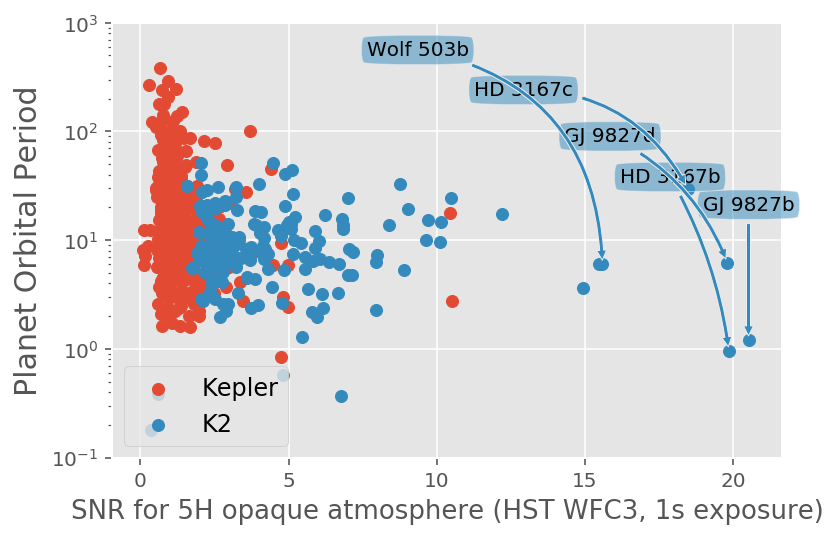

In [25]:
fig, ax = plt.subplots()
ok = (np.asarray(kepler.pl_radj)*u.jupiterRad).to(u.earthRad) < small
plt.scatter((kepler[ok].snr),kepler[ok].pl_orbper, label='Kepler')

ok = (np.asarray(k2.pl_radj)*u.jupiterRad).to(u.earthRad) < small
plt.scatter((k2[ok].snr),k2[ok].pl_orbper, label='K2')
        
plt.ylabel('Planet Orbital Period', fontsize=15)
plt.ylim(1e-1, 1e3)
plt.xlabel('SNR for 5H opaque atmosphere (HST WFC3, 1s exposure)', fontsize=13)
plt.yscale('log')
plt.legend(fontsize=12, loc='lower left')

#Annotations
i=0
df1 = k2[ok].sort_values('snr', ascending=False)
for i, n, l, x, y  in zip(range(len(df)), df1.pl_hostname, df1.pl_letter, df1.snr, df1.pl_orbper):
    ann = ax.annotate("{}{}".format(n, l),
                      xy=(x, y), xycoords='data',
                      xytext=(x*(1-(i*0.1)), y+(10+(np.exp(i)*10))), textcoords='data',
                      size=10, va="center", ha="center",
                      bbox=dict(boxstyle="round4", fc="C1", alpha=0.5),
                      arrowprops=dict(arrowstyle="simple",
                                      connectionstyle="arc3, rad=-{}".format(0.1*i),
                                      fc="C1"), 
                      )
    i+=1
    if i>=5:
        break


In [26]:
both =kepler.append(k2).reset_index(drop=True)
ok = (np.asarray(both.pl_radj)*u.jupiterRad).to(u.earthRad) < small
top = both[ok][['pl_hostname','pl_letter', 'st_h','pl_eqt','pl_radj','pl_bmassj','pl_orbper','delta','snr','pl_facility','pl_disc']].sort_values('snr', ascending=False)[0:20].reset_index(drop=True)

/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [27]:
top

,pl_hostname,pl_letter,st_h,pl_eqt,pl_radj,pl_bmassj,pl_orbper,delta,snr,pl_facility,pl_disc
0,GJ 9827,b,7.379,1172.000000,0.1450,0.012406,1.208980,0.000206,20.524550,K2,2017.0
1,HD 3167,b,7.203,1669.000000,0.1520,0.012962,0.959624,0.000164,19.861477,K2,2016.0
2,GJ 9827,d,7.379,680.000000,0.1850,0.015561,6.201467,0.000191,19.810535,K2,2017.0
3,HD 3167,c,7.203,531.000000,0.2550,0.020973,29.838320,0.000142,18.470181,K2,2016.0
4,Wolf 503,b,7.774,805.000000,0.1810,0.015248,6.001180,0.000171,15.594254,K2,2018.0
5,Wolf 503,b,7.774,792.376066,0.1811,0.015256,6.001300,0.000168,15.473961,K2,NaN
6,GJ 9827,c,7.379,811.000000,0.1130,0.007610,3.648083,0.000109,14.930328,K2,2017.0
7,K2-136,c,8.496,425.000000,0.2600,0.021355,17.307137,0.000203,12.208278,K2,2017.0
8,Kepler-21,b,7.031,2025.000000,0.1460,0.012486,2.785780,0.000039,10.511668,Kepler,2012.0
9,K2-233,d,8.501,482.000000,0.2360,0.019516,24.366200,0.000151,10.484889,K2,2018.0


In [28]:
ok = ((np.asarray(df.pl_radj)*u.jupiterRad).to(u.earthRad) < small) & (df.pl_tranflag==1)
top = df[ok][['pl_hostname','pl_letter', 'st_h','pl_eqt','pl_radj','pl_bmassj','pl_orbper','delta','snr','pl_facility','pl_disc']].sort_values('snr', ascending=False)[0:20].reset_index(drop=True)

/Users/ch/miniconda3/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in less
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [29]:
top.loc[0, 'pl_bmassj']*u.jupiterMass.to(u.earthMass)

4.738821542326601